In [1]:
# Install packages
# https://github.com/keflavich/imf
# pip install gaiaunlimited
# pip install pygaia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modules.ClusterSim import ClusterSim

In [2]:
# ------ Path files ------
fpath = '/Users/ratzenboe/Documents/work/code/SF-Retreat2024/isochrone_files/'
parsec_files = fpath + 'parsec_files/'
baraffe_files = fpath + 'baraffe_files/'
fname_spline_csv = 'LogErrVsMagSpline.csv'
fname_astrometric_corr = 'astrometric_corr.npz'
# -----------------------

In [3]:
kwargs = dict(
    mu=[100, 10, -10, 20, 20, -10],
    cov=np.eye(6),
    mass=1e3,
    logAge=7.5,
    feh=0., f_bin=0.3, 
    parsec_folder=parsec_files, 
    baraffe_folder=baraffe_files,
    M_G_threshold=5, 
    spline_csv=fname_spline_csv, 
    astrometric_corr=fname_astrometric_corr
)

In [4]:
cl_sim = ClusterSim(**kwargs)

PARSEC isochrones read and processed!
Baraffe+15 isochrones read and processed!
Total cluster mass is 1000.12 (limit was 1000)
Initializing the scanning law object...
Estimating completeness...


In [5]:
df_obs = cl_sim.data_observed(mu=[300, 300, 0, 20, 20, 10], mass=4e2, logAge=7.)
df_true = cl_sim.data_true()
# Compute color
df_obs['BP_RP'] = df_obs.phot_bp_mean_mag - df_obs.phot_rp_mean_mag

Total cluster mass is 377.324 (limit was 400)


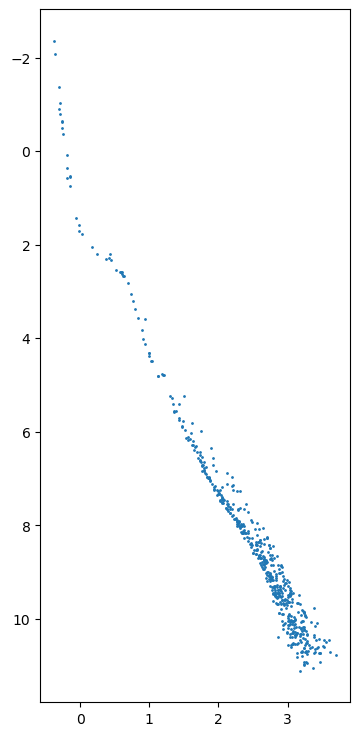

In [6]:
plt.figure(figsize=(4, 9))
plt.scatter(df_obs.BP_RP, df_obs.M_G, s=1)
# plt.scatter(df_true.G_BP - df_true.G_RP, df_true.M_G, s=1)
# invert y axis
plt.gca().invert_yaxis()

Total cluster mass is 404.292 (limit was 400)


/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


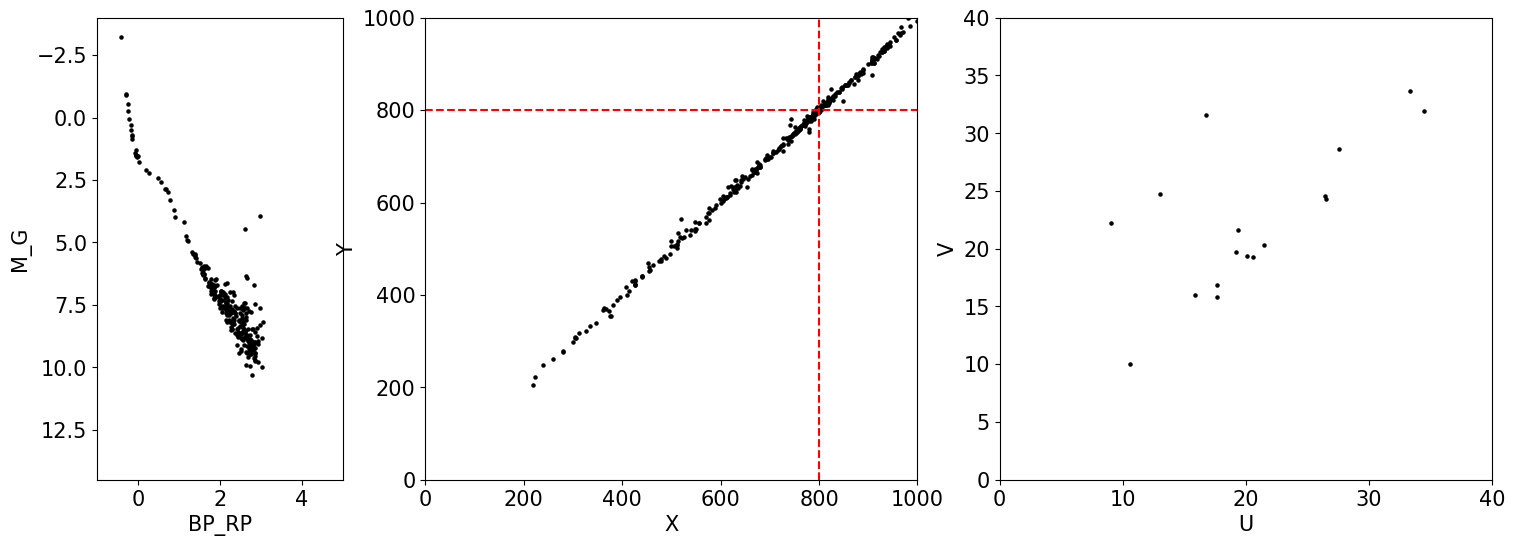

In [26]:
# Plot cluster in CMD, X-Y, and U-V
dist = 800
df_obs = cl_sim.data_observed(mu=[dist, dist, 0, 20, 20, 10], mass=4e2, logAge=7.)
df_obs['BP_RP'] = df_obs.phot_bp_mean_mag - df_obs.phot_rp_mean_mag


fig, axes = plt.subplots(1, 3, figsize=(18, 6), width_ratios=[0.5, 1, 1])
ax_pair = [('BP_RP', 'M_G'), ('X', 'Y'), ('U', 'V')]
ax_ranges = [[(-1, 5), (14.5, -4)], [(0, 1000), (0, 1000)], [(0, 40), (0, 40)]]
for i, (ax, xy_ax, ax_ranges) in enumerate(zip(axes, ax_pair, ax_ranges)):
    ax.scatter(df_obs[xy_ax[0]], df_obs[xy_ax[1]], s=5, c='k')
    ax.set_xlabel(xy_ax[0], size=15)
    ax.set_ylabel(xy_ax[1], size=15)
    # Increase tick font size
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlim(ax_ranges[0])
    ax.set_ylim(ax_ranges[1])
    if i == 1:
        ax.axvline(dist, c='r', ls='--')
        ax.axhline(dist, c='r', ls='--')
    
plt.savefig(f'/Users/ratzenboe/Desktop/retreat/cluster_sim_{dist}.png', dpi=200)